In [1]:
import sys
sys.path.append("/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/svg2plan/_scripts")

import os
from xml.dom import minidom
from dataclasses import dataclass

from shapely import LinearRing, Polygon

from svg_reader import SVGReader

In [2]:
svg_file = "../../svg_imports/amber_building_a_f01.svg"
svg_name = "amber_building_a_f01.svg"

In [3]:
s = SVGReader(svg_name)
s.run()

In [4]:
s.domains

{'bedroom_1': <POLYGON ((0 -234, 269 -234, 269 0, 0 0, 0 -234))>,
 'kitchen': <POLYGON ((281 135, 431 135, 431 322, 281 322, 281 135))>,
 'm_bath': <POLYGON ((443 -109, 637 -109, 637 0, 443 0, 443 -109))>,
 'm_bedroom': <POLYGON ((652 -229, 830 -229, 830 0, 652 0, 652 -229))>,
 'm_closet': <POLYGON ((746 184, 830 184, 830 234, 746 234, 746 184))>,
 'bath': <POLYGON ((443 23, 637 23, 637 126, 443 126, 443 23))>,
 'dining': <POLYGON ((453 -17, 734 -17, 734 246, 453 246, 453 -17))>,
 'transit_space': <POLYGON ((281 10, 431 10, 431 159, 281 159, 281 10))>,
 'closet': <POLYGON ((746 111, 830 111, 830 312, 746 312, 746 111))>,
 'bedroom_2': <POLYGON ((0 -17, 269 -17, 269 246, 0 246, 0 -17))>,
 'laundry': <POLYGON ((282 -143, 416 -143, 416 3, 282 3, 282 -143))>}

In [4]:
def get_rectangle(path):
    s = SVGRect(
        path.getAttribute('x'),
        path.getAttribute('y'),
        path.getAttribute('width'),
        path.getAttribute('height'),
        path.getAttribute("id")
    )
    return s

In [5]:
doc = minidom.parse(svg_file)  # parseString also exists
rectangles = [get_rectangle(path) for path
                in doc.getElementsByTagName('rect')]
doc.unlink()

In [6]:
rectangles

[SVGRect(x='', y='', width='269', height='234', id='bedroom_1'),
 SVGRect(x='281', y='322', width='150', height='187', id='kitchen'),
 SVGRect(x='443', y='', width='194', height='109', id='m_bath'),
 SVGRect(x='652', y='', width='178', height='229', id='m_bedroom'),
 SVGRect(x='746', y='234', width='84', height='50', id='m_closet'),
 SVGRect(x='443', y='126', width='194', height='103', id='bath'),
 SVGRect(x='453', y='246', width='281', height='263', id='dining'),
 SVGRect(x='281', y='159', width='150', height='149', id='transit_space'),
 SVGRect(x='746', y='312', width='84', height='201', id='closet'),
 SVGRect(x='', y='246', width='269', height='263', id='bedroom_2'),
 SVGRect(x='282', y='3', width='134', height='146', id='laundry')]

In [7]:
len(rectangles)

11

In [21]:
def to_shapely_rect(r:SVGRect):
    x0 = float(r.x) if r.x else 0
    y0 = float(r.y) if r.y else 0
    x1 = x0 + float(r.width)
    y1 = y0 - float(r.height)

    # ccw from bottom left
    coords = [(x0, y1), (x1, y1), (x1, y0), (x0, y0)]
    shape = Polygon(LinearRing(coords))

    return shape


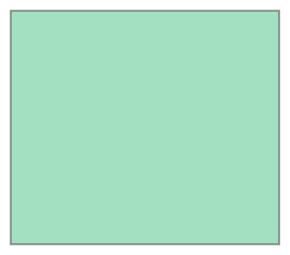

In [22]:
to_shapely_rect(rectangles[0])